
According to Wikipedia, the **Human Development Index** (HDI) s a statistical composite index of life expectancy, education (mean years of schooling completed and expected years of schooling upon entering the education system), and per capita income indicators, which is used to rank countries into four tiers of human development. A country scores a higher level of HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher. It was developed by Pakistani economist Mahbub ul-Haq and was further used to measure a country's development by the United Nations Development Programme (UNDP)'s Human Development Report Office.

[RadicalLiberation](https://www.youtube.com/@RadicalLiberation), in his reading of _Triumph of Faith_ by Rodney Stark ([Global Religious Resurgence](https://www.youtube.com/live/RxZbjmuSZfI?si=f0e6oC9lBThQ6kE6&t=1365)), states that 


# Weekly Worship vs Human Development Index

The worship data is from [https://assets.pewresearch.org/wp-content/uploads/sites/11/2018/06/12094011/Appendix-B.pdf](https://assets.pewresearch.org/wp-content/uploads/sites/11/2018/06/12094011/Appendix-B.pdf) and the HDI data is from [https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index](https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index). The jupyter notebook can be seen at [https://github.com/dbabbitt/StatsByCountry/blob/master/ipynb/Weekly%20Worship%20vs%20Fertility.ipynb](https://github.com/dbabbitt/StatsByCountry/blob/master/ipynb/Weekly%20Worship%20vs%20Fertility%20Rate.ipynb).

A [low R-square of at least 0.1 (or 10 percent)](https://www.researchgate.net/publication/361406942_The_Acceptable_R-Square_in_Empirical_Modelling_for_Social_Science_Research) is acceptable in the social sciences on the condition that some or most of the predictors or explanatory variables are statistically significant.

In [1]:

%pprint
%run ../load_magic/soup.py
%run ../load_magic/lists.py
%run ../load_magic/charts.py

url = 'https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependencies_by_total_fertility_rate'
table_dfs_list = get_page_tables(url)

Pretty printing has been turned OFF
[(12, (534, 3)), (18, (526, 3)), (3, (519, 3)), (0, (512, 3)), (6, (502, 3)), (9, (464, 3)), (15, (444, 3)), (20, (287, 3)), (7, (271, 3)), (13, (266, 3)), (2, (265, 3)), (14, (264, 3)), (4, (258, 3)), (5, (257, 3)), (1, (243, 3)), (19, (235, 3)), (10, (233, 3)), (8, (227, 3)), (11, (227, 3)), (16, (221, 3)), (17, (219, 3)), (24, (9, 3)), (21, (12, 2)), (26, (4, 2)), (29, (4, 2)), (23, (3, 2)), (25, (3, 2)), (30, (3, 2)), (27, (2, 2)), (28, (2, 2)), (22, (1, 2))]


In [2]:

fertility_df = table_dfs_list[0].copy().replace('-', np.nan).dropna().iloc[1:193]
fertility_df.columns = ['Rank', 'Country', 'Fertility_Rate_2022']
fertility_df.Fertility_Rate_2022 = fertility_df.Fertility_Rate_2022.map(lambda x: float(str(x).split(' ')[0]))
fertility_df

,Rank,Country,Fertility_Rate_2022
3,1,Niger,6.6
4,2,Somalia,5.7
5,3,DR Congo,5.5
6,4,Mali,5.5
7,5,Chad,5.4
...,...,...,...
192,188,Moldova,1.3
193,189,Italy,1.3
194,190,Bosnia and Herzegovina,1.2
195,191,Singapore,1.2


In [3]:

# From https://assets.pewresearch.org/wp-content/uploads/sites/11/2018/06/12094011/Appendix-B.pdf
file_path = '../data/html/religious_commitment_by_country.html'
commitment_df = pd.read_html(file_path)[0].copy()
commitment_df.columns = [str(cn).replace(' ', '_') for cn in commitment_df.iloc[0]]
commitment_df = commitment_df.iloc[1:]
for cn in ['Overall_Affiliate', 'Overall_Attend_weekly', 'Overall_Pray_daily', 'Overall_Very_important', 'Adults_<_40_Affiliate',
           'Adults_<_40_Attend_weekly', 'Adults_<_40_Pray_daily', 'Adults_<_40_Very_important', 'Adults_40+_Affiliate',
           'Adults_40+_Attend_weekly', 'Adults_40+_Pray_daily', 'Adults_40+_Very_important']:
    commitment_df[cn] = commitment_df[cn].map(lambda x: re.sub(r'\D+', '', str(x)))
    commitment_df[cn] = pd.to_numeric(commitment_df[cn], errors='coerce')
commitment_df

,Country,Overall_Affiliate,Overall_Attend_weekly,Overall_Pray_daily,Overall_Very_important,Adults_<_40_Affiliate,Adults_<_40_Attend_weekly,Adults_<_40_Pray_daily,Adults_<_40_Very_important,Adults_40+_Affiliate,Adults_40+_Attend_weekly,Adults_40+_Pray_daily,Adults_40+_Very_important
1,World,88,39,49,54,85,36,44.0,51.0,90.0,42.0,54.0,57.0
2,Asia-Pacific,85,34,50,53,82,31,46.0,51.0,86.0,37.0,55.0,55.0
3,Europe,81,14,22,23,75,10,16.0,19.0,85.0,16.0,26.0,26.0
4,Latin America-Caribbean,90,43,62,68,87,38,55.0,63.0,93.0,48.0,69.0,73.0
5,Middle East-North Africa,100,49,70,73,100,44,65.0,71.0,100.0,55.0,77.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Uruguay,63,14,29,29,52,10,18.0,22.0,70.0,16.0,36.0,33.0
109,Uzbekistan,99,9,26,29,100,8,18.0,26.0,98.0,11.0,36.0,34.0
110,Venezuela,93,26,47,67,91,21,44.0,64.0,97.0,31.0,52.0,70.0
111,Vietnam,36,14,18,36,15,16,36.0,13.0,21.0,NaN,NaN,NaN


In [4]:

mask_series = (commitment_df.Country == 'Puerto Rico')
commitment_df.loc[mask_series, 'Country'] = 'Puerto Rico (US)'
mask_series = (commitment_df.Country == 'Dominican Rep.')
commitment_df.loc[mask_series, 'Country'] = 'Dominican Republic'
mask_series = (commitment_df.Country == 'Congo DR')
commitment_df.loc[mask_series, 'Country'] = 'DR Congo'
mask_series = (commitment_df.Country == 'Palestinian Terr.')
commitment_df.loc[mask_series, 'Country'] = 'Palestine'

In [5]:

left_list = list(set(fertility_df.Country) - set(commitment_df.Country))
df = check_for_typos(left_list, set(commitment_df.Country))
df.sort_values('max_similarity', ascending=False).head(20)

,left_item,right_item,max_similarity
54,Iceland,Ireland,0.857143
76,Gambia,Zambia,0.833333
51,North Korea,South Korea,0.818182
59,Malawi,Mali,0.800000
17,Namibia,Zambia,0.769231
75,Congo,DR Congo,0.769231
84,Slovenia,Slovakia,0.750000
8,Aruba (Netherlands),Netherlands,0.733333
80,Syria,Serbia,0.727273
45,Guyana,Ghana,0.727273


In [6]:

mask_series = (commitment_df.Country == 'Bosnia-Herz.')
commitment_df.loc[mask_series, 'Country'] = 'Bosnia and Herzegovina'

In [7]:

left_list = list(set(commitment_df.Country) - set(fertility_df.Country))
df = check_for_typos(left_list, set(fertility_df.Country))
df.sort_values('max_similarity', ascending=False).head(20)

,left_item,right_item,max_similarity
2,South Korea,North Korea,0.818182
0,Sub-Saharan Africa,South Africa,0.666667
6,Middle East-North Africa,South Africa,0.555556
4,World,Poland,0.545455
5,Europe,Turkey,0.500000
1,Kosovo,Lesotho,0.461538
3,Asia-Pacific,Jamaica,0.421053
7,Latin America-Caribbean,Saudi Arabia,0.400000


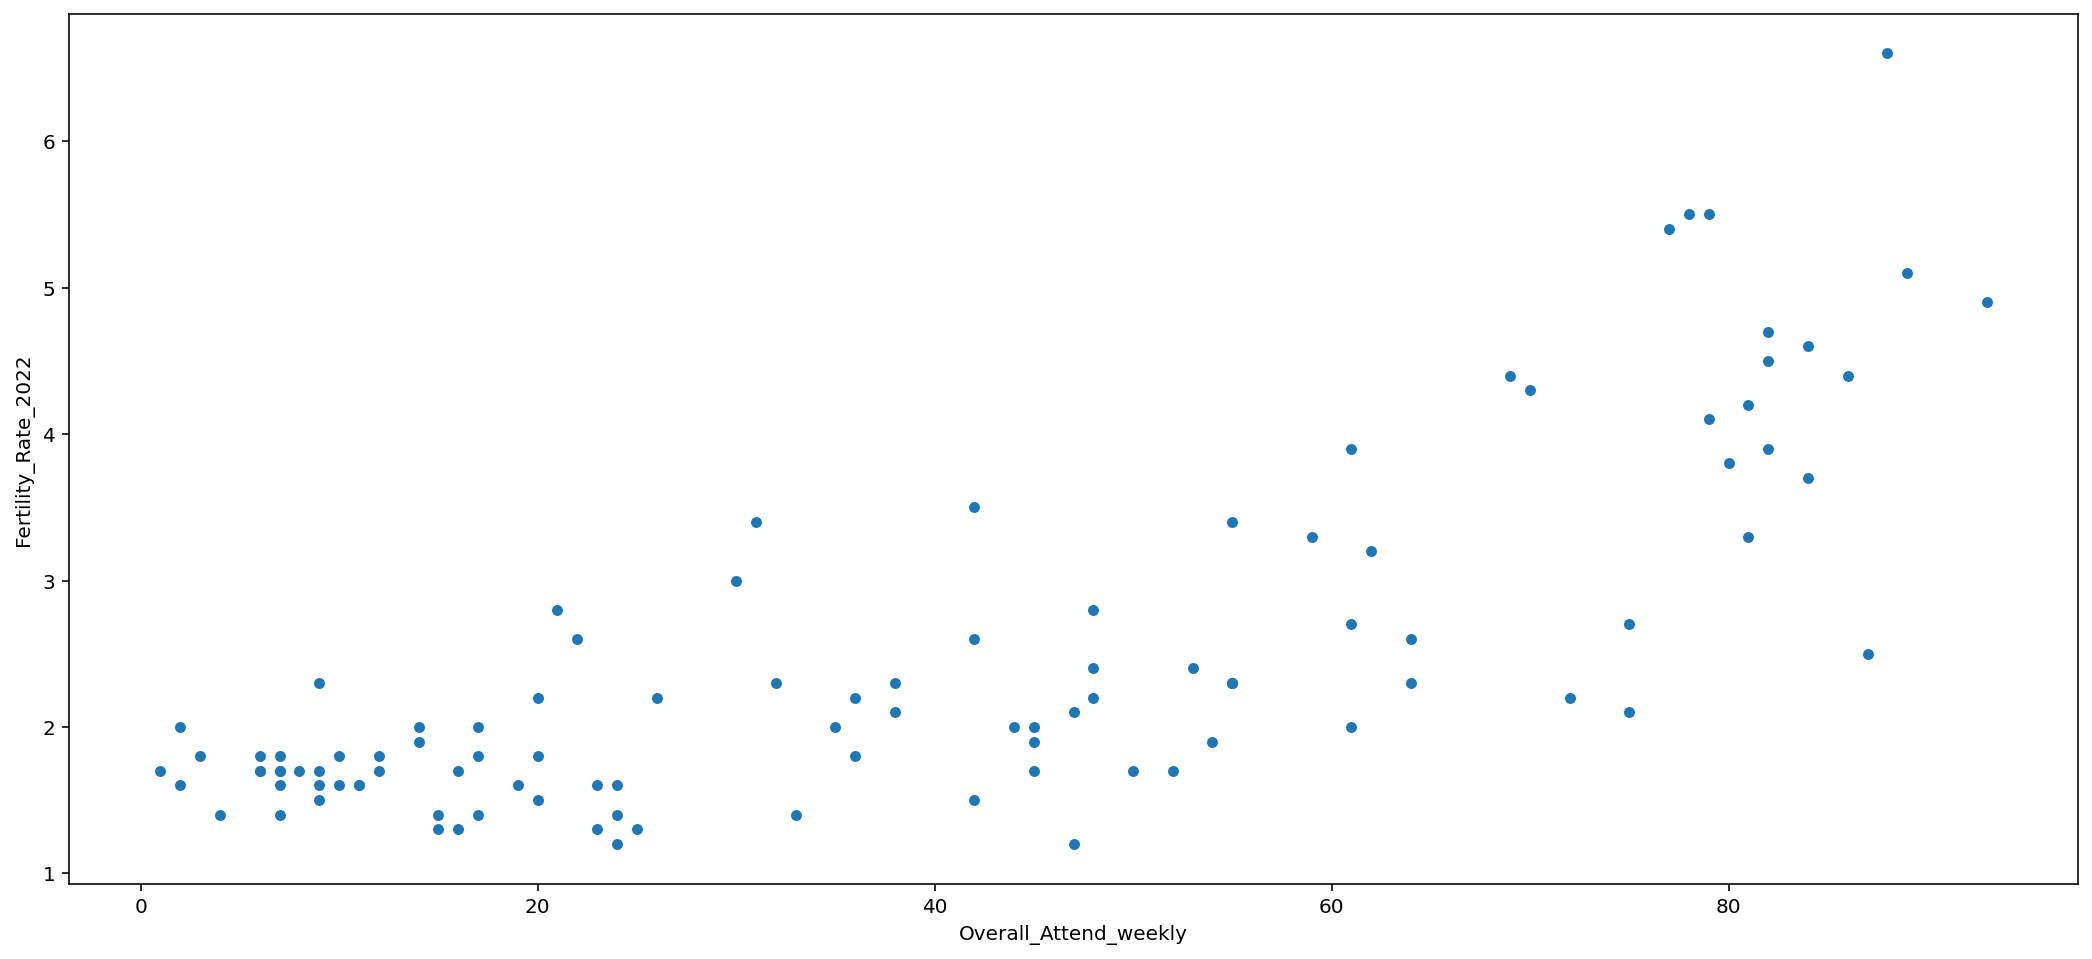

In [130]:

import matplotlib.pyplot as plt

countries_set = set(commitment_df.Country).intersection(set(fertility_df.Country))
rows_list = []
for country_name in countries_set:
    row_dict = {}
    row_dict['country_name'] = country_name
    mask_series = (commitment_df.Country == country_name)
    Overall_Attend_weekly = commitment_df[mask_series].Overall_Attend_weekly.squeeze()
    row_dict['Overall_Attend_weekly'] = Overall_Attend_weekly
    mask_series = (fertility_df.Country == country_name)
    Fertility_Rate_2022 = fertility_df[mask_series].Fertility_Rate_2022.squeeze()
    row_dict['Fertility_Rate_2022'] = Fertility_Rate_2022
    rows_list.append(row_dict)
df = pd.DataFrame(rows_list).sort_values('Overall_Attend_weekly')
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
Line2D_objs_list = df.plot.scatter('Overall_Attend_weekly', 'Fertility_Rate_2022', ax=ax)

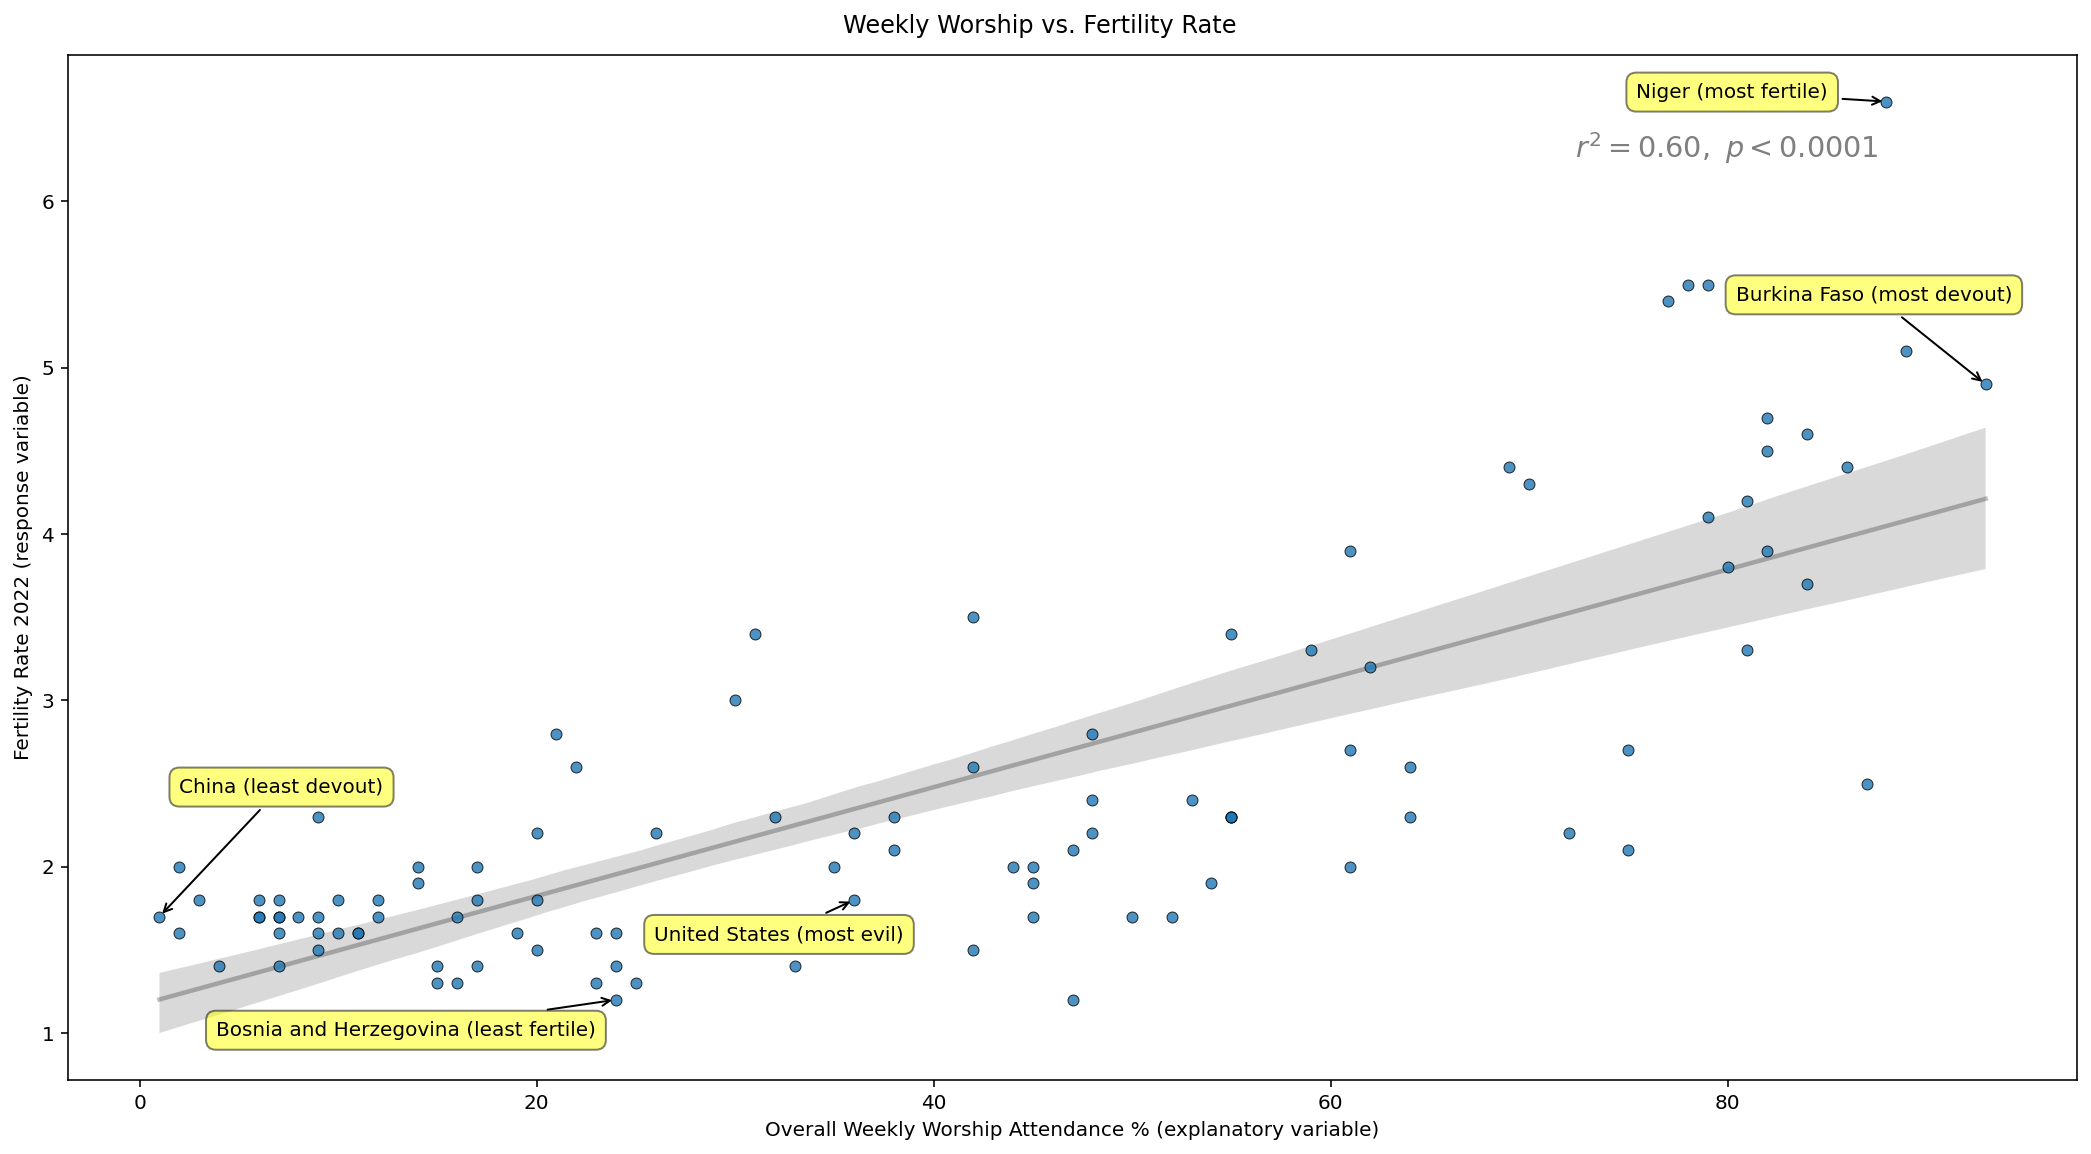

In [131]:

fig = first_order_linear_scatterplot(df.set_index('country_name'), 'Overall_Attend_weekly', 'Fertility_Rate_2022',
                                     xlabel_str='Overall Weekly Worship Attendance % (explanatory variable)',
                                     ylabel_str='Human Development Index 2022 (response variable)',
                                     x_adj='devout', y_adj='fertile',
                                     title='Weekly Worship vs. Human Development Index',
                                     # idx_reference='Kenya', annot_reference='',
                                     least_x_xytext=(10, 60), most_x_xytext=(-125, 40),
                                     least_y_xytext=(-200, -20), most_y_xytext=(-125, 0),
                                     reference_xytext=(-100, -22), color_list=None)


The US label is a light-hearted parody of the morally conceited nature of Reddit social dynamics. Take it in the spirit it was given.

In [115]:

save_fig_as_various(fig, 'weekly_worship_vs_fertility', dir_names_list=['png'], verbose=True)

Saving plot to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\png\weekly_worship_vs_fertility.png



# Irreligion vs Human Development Index

Maybe this one will look better?

In [32]:

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_irreligion'
table_dfs_list = get_page_tables(url)

[(0, (98, 7)), (1, (53, 3)), (3, (9, 2)), (2, (2, 2))]


In [33]:

irreligion_df = table_dfs_list[0].copy()
irreligion_df.columns = ['Country', 'Pew_2012', 'WIN_GIA_2017', 'WIN_GIA_2015', 'WIN_GIA_2012', 'Dentsu_2006', 'Zuckerman_2004']
irreligion_df.Country = irreligion_df.Country.map(lambda x: str(x).split('(')[0].strip())
numerics_list = ['Pew_2012', 'WIN_GIA_2017', 'WIN_GIA_2015', 'WIN_GIA_2012', 'Dentsu_2006', 'Zuckerman_2004']
irreligion_df = clean_numerics(irreligion_df, columns_list=numerics_list)
irreligion_df

,Country,Pew_2012,WIN_GIA_2017,WIN_GIA_2015,WIN_GIA_2012,Dentsu_2006,Zuckerman_2004
0,Afghanistan,0.1,NaN,9.0,15.0,NaN,NaN
1,Albania,1.4,39.0,NaN,NaN,NaN,8.0
2,Argentina,12.2,34.0,20.0,26.0,13.0,48.0
3,Armenia,1.3,6.0,5.0,5.0,NaN,34.0
4,Australia,24.2,63.0,58.0,58.0,NaN,2425.0
...,...,...,...,...,...,...,...
93,United States,16.4,39.0,39.0,35.0,20.0,39.0
94,Uruguay,40.7,NaN,NaN,NaN,NaN,12.0
95,Uzbekistan,0.8,NaN,NaN,18.0,NaN,NaN
96,Venezuela,10.0,NaN,2.0,NaN,27.0,NaN


In [34]:

mask_series = (irreligion_df.Country == 'Puerto Rico')
irreligion_df.loc[mask_series, 'Country'] = 'Puerto Rico (US)'

In [35]:

left_list = list(set(fertility_df.Country) - set(irreligion_df.Country))
df = check_for_typos(left_list, set(irreligion_df.Country))
df.sort_values('max_similarity', ascending=False).head(20)

,left_item,right_item,max_similarity
76,Niger,Nigeria,0.833333
20,Tajikistan,Pakistan,0.777778
82,Congo,DR Congo,0.769231
11,Aruba (Netherlands),Netherlands,0.733333
67,Malawi,Malta,0.727273
54,Guyana,Ghana,0.727273
88,Syria,Serbia,0.727273
40,Liberia,Nigeria,0.714286
19,Algeria,Nigeria,0.714286
26,Somalia,Romania,0.714286


In [36]:

mask_series = (irreligion_df.Country == 'Palestinian territories')
irreligion_df.loc[mask_series, 'Country'] = 'Palestine'

In [37]:

left_list = list(set(irreligion_df.Country) - set(fertility_df.Country))
df = check_for_typos(left_list, set(fertility_df.Country))
df.sort_values('max_similarity', ascending=False).head(20)

,left_item,right_item,max_similarity
0,South Korea,North Korea,0.818182
2,Taiwan,Thailand,0.714286
1,Kosovo,Lesotho,0.461538


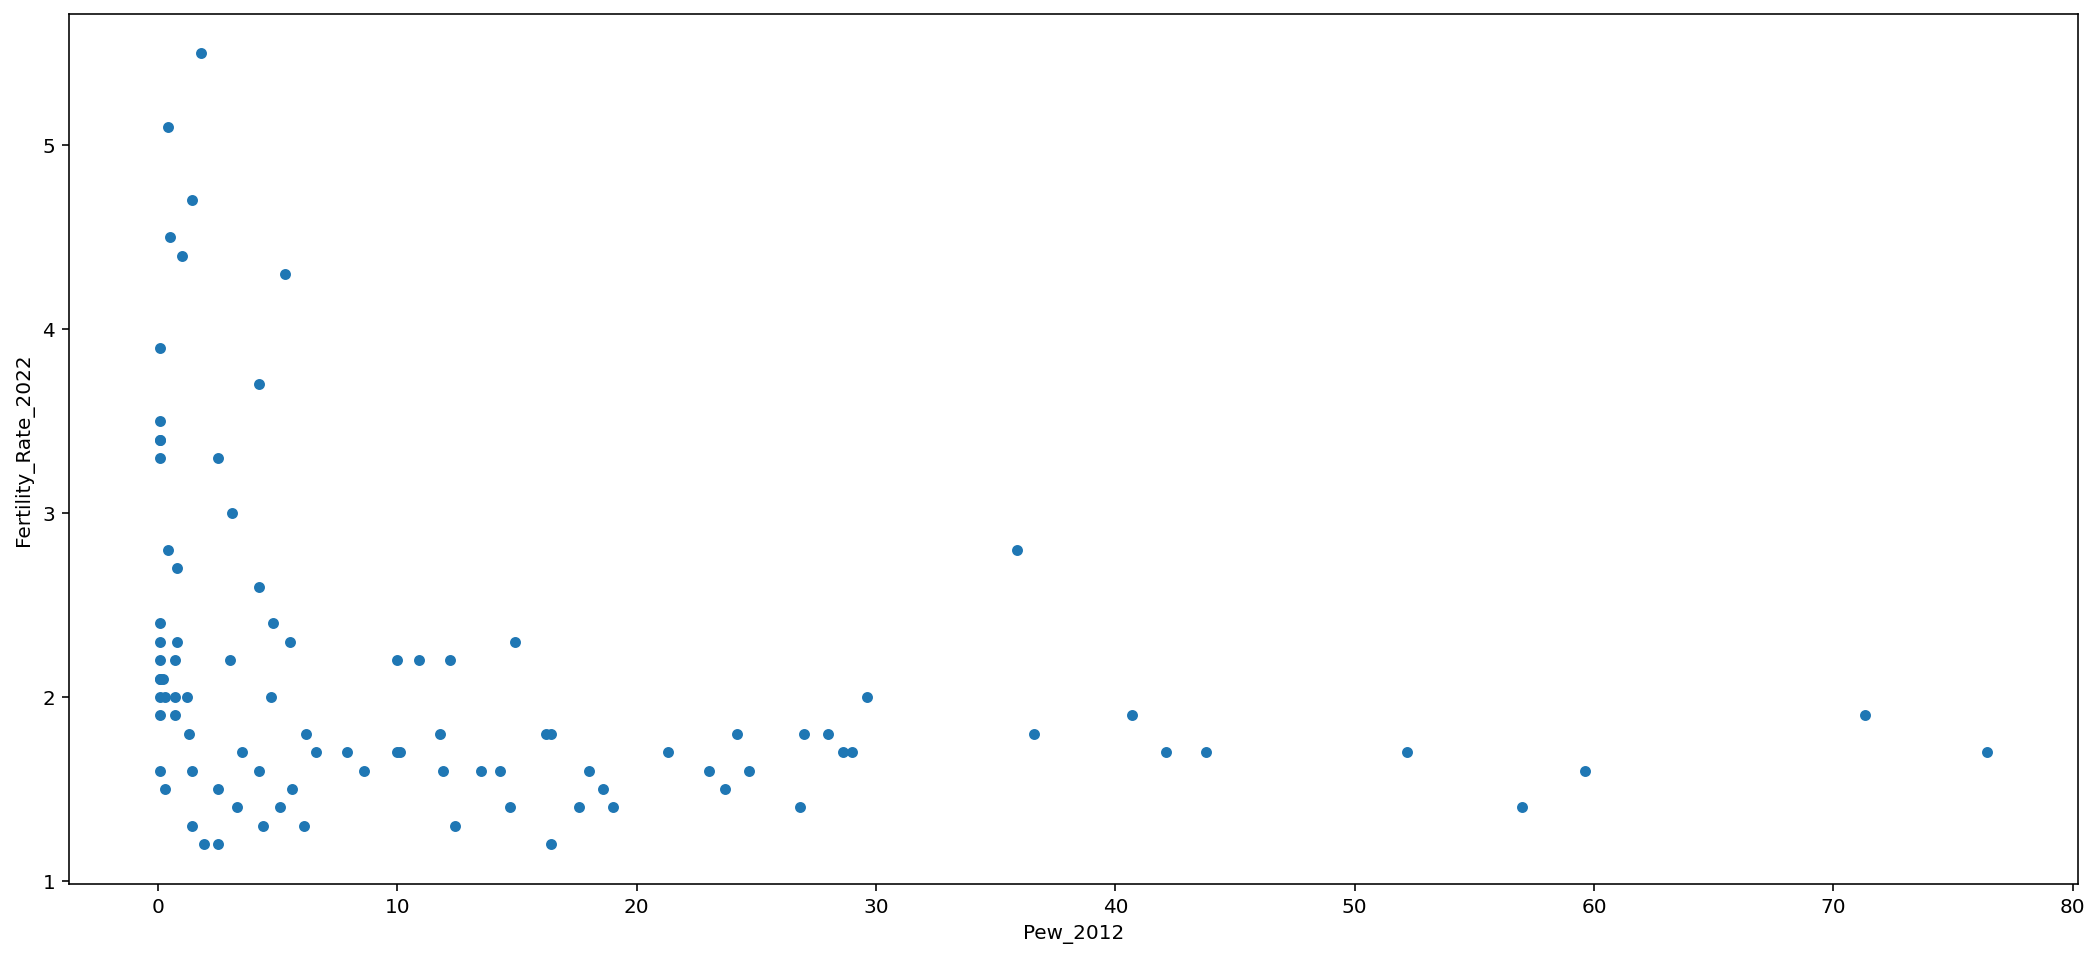

In [38]:

countries_set = set(irreligion_df.Country).intersection(set(fertility_df.Country))
rows_list = []
for country_name in countries_set:
    row_dict = {}
    row_dict['country_name'] = country_name
    mask_series = (irreligion_df.Country == country_name)
    Pew_2012 = irreligion_df[mask_series].Pew_2012.squeeze()
    row_dict['Pew_2012'] = Pew_2012
    mask_series = (fertility_df.Country == country_name)
    Fertility_Rate_2022 = fertility_df[mask_series].Fertility_Rate_2022.squeeze()
    row_dict['Fertility_Rate_2022'] = Fertility_Rate_2022
    rows_list.append(row_dict)
df = pd.DataFrame(rows_list).sort_values('Pew_2012')
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
Line2D_objs_list = df.plot.scatter('Pew_2012', 'Fertility_Rate_2022', ax=ax)

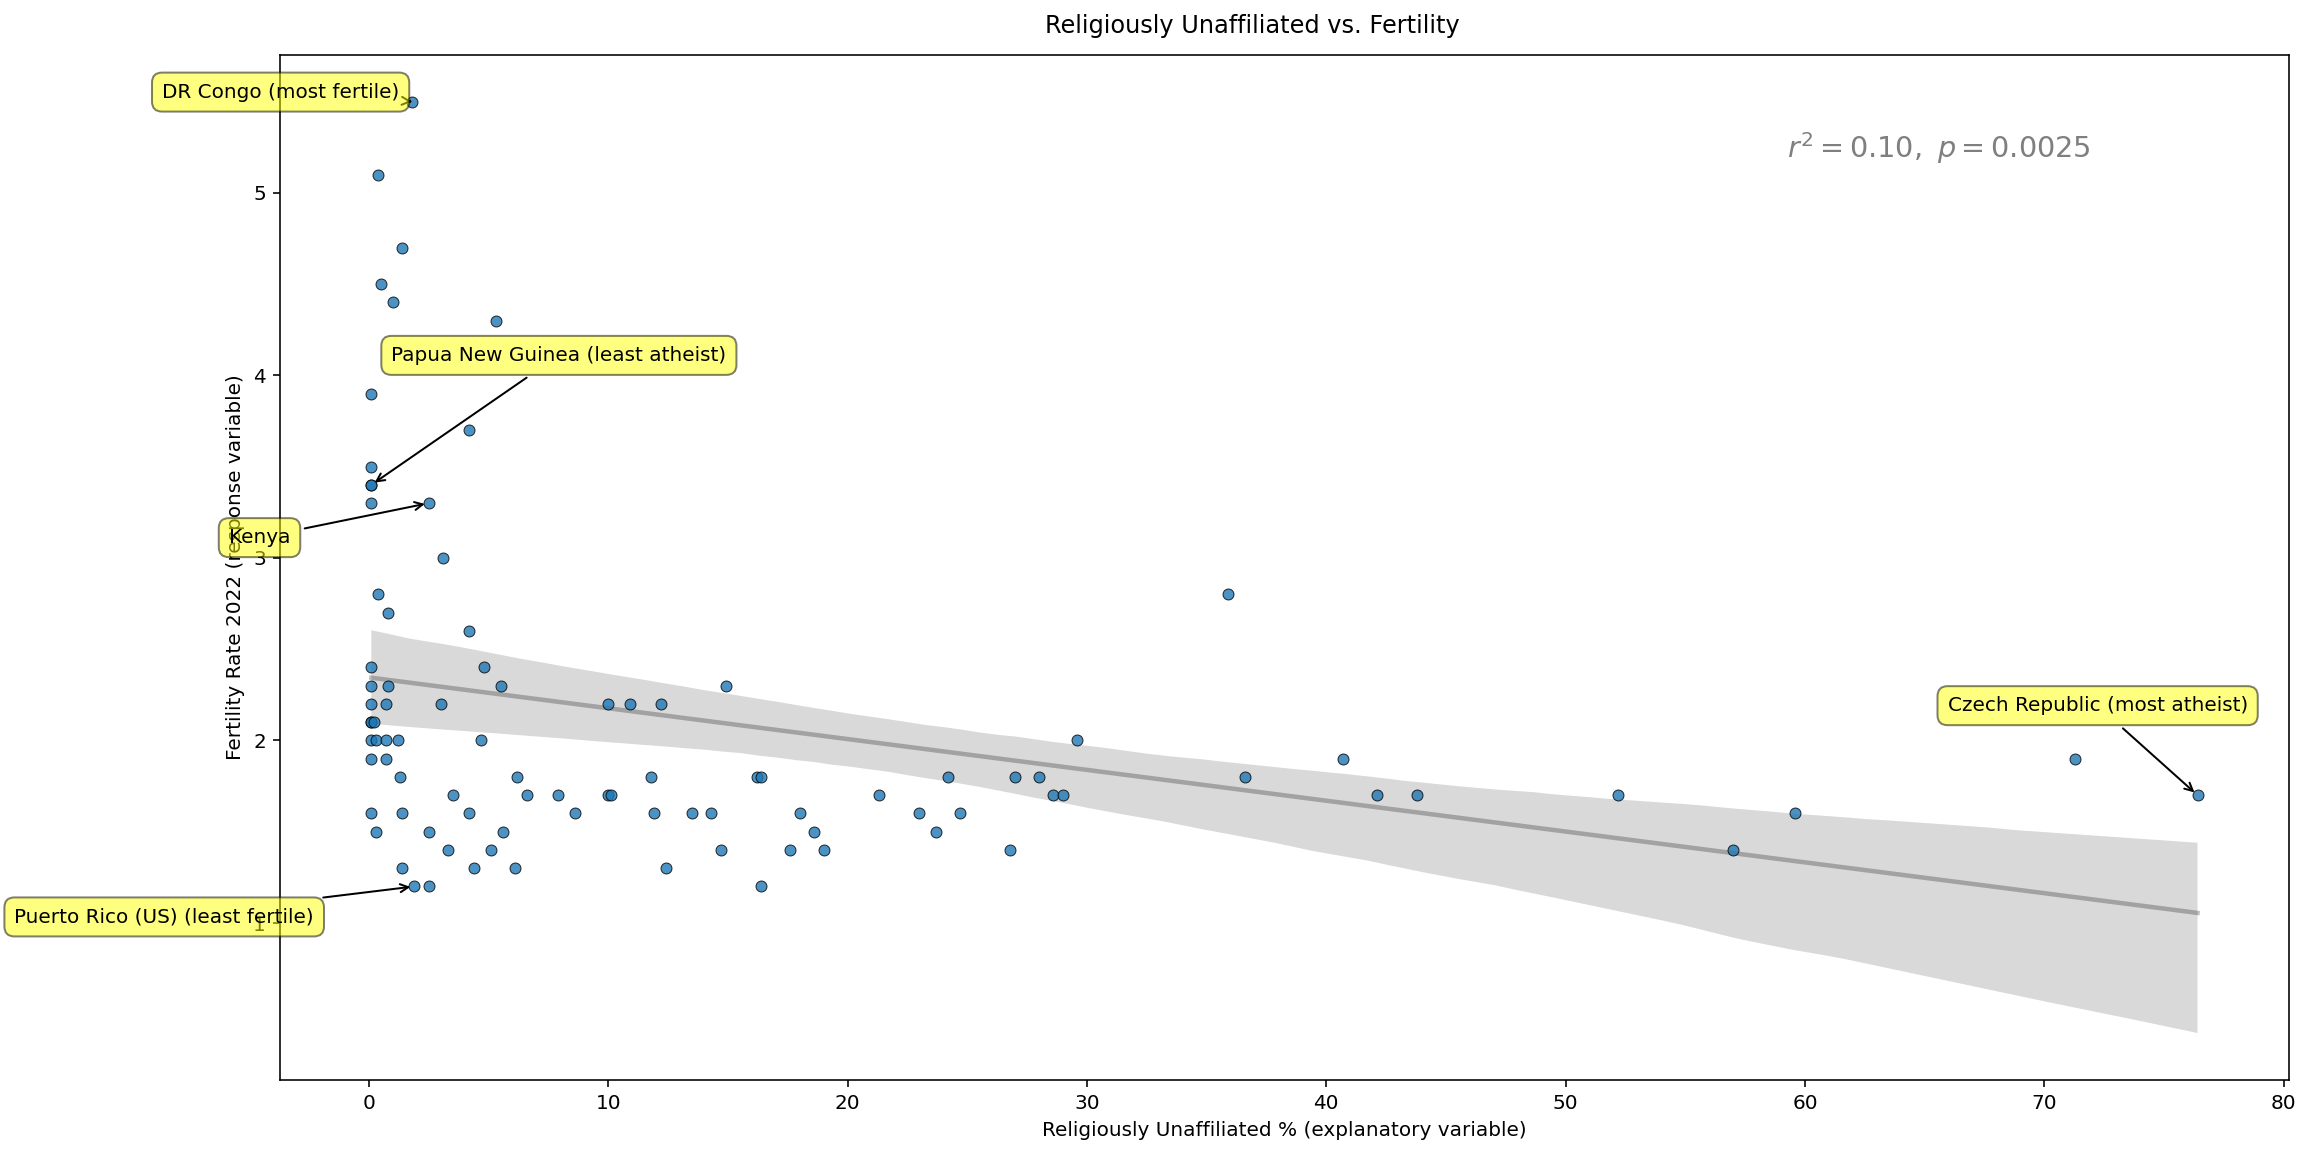

In [41]:

fig = first_order_linear_scatterplot(df.set_index('country_name'), 'Pew_2012', 'Fertility_Rate_2022',
                                     xlabel_str='Religiously Unaffiliated % (explanatory variable)',
                                     ylabel_str='Human Development Index 2022 (response variable)',
                                     x_adj='atheist', y_adj='fertile',
                                     title='Religiously Unaffiliated vs. Fertility',
                                     idx_reference='Kenya', annot_reference='',
                                     least_x_xytext=(10, 60), most_x_xytext=(-125, 40),
                                     least_y_xytext=(-200, -20), most_y_xytext=(-125, 0),
                                     reference_xytext=(-100, -22), color_list=None, verbose=False)


# Urbanization vs Human Development Index

This would be the other graph

In [42]:

url = 'https://en.wikipedia.org/wiki/Urbanization_by_country'
table_dfs_list = get_page_tables(url)

[(0, (229, 6)), (1, (12, 2))]


In [67]:

urbanization_df = table_dfs_list[0].copy()
urbanization_df.columns = ['Rank', 'Country', 'Urban_Population_Percent', 'Date', 'Urbanization_Rate_Percent', 'Period']
# urbanization_df.Country = urbanization_df.Country.map(lambda x: str(x).split('(')[0].strip())
numerics_list = ['Rank', 'Urban_Population_Percent', 'Date', 'Urbanization_Rate_Percent']
urbanization_df = clean_numerics(urbanization_df, columns_list=numerics_list)
urbanization_df

,Rank,Country,Urban_Population_Percent,Date,Urbanization_Rate_Percent,Period
0,1.0,Kuwait,100.0,2020,1.78,2015–20 est.
1,1.0,Monaco,100.0,2020,0.51,2015–20 est.
2,1.0,Nauru,100.0,2020,0.06,2015–20 est.
3,1.0,Singapore,100.0,2020,1.39,2015–20 est.
4,1.0,Vatican City,100.0,2020,2.00,NaN
...,...,...,...,...,...,...
224,194.0,Papua New Guinea,13.3,2020,2.51,2015–20 est.
225,NaN,Montserrat (UK),9.1,2020,0.64,2015–20 est.
226,NaN,Pitcairn Islands (UK),0.0,2012,NaN,NaN
227,NaN,Tokelau (New Zealand),0.0,2020,0.00,2015–20 est.


In [68]:

left_list = list(set(fertility_df.Country) - set(urbanization_df.Country))
df = check_for_typos(left_list, set(urbanization_df.Country))
df.sort_values('max_similarity', ascending=False).head(20)

,left_item,right_item,max_similarity
5,French Guiana (France),French Polynesia (France),0.765957
0,Somalia,Romania,0.714286
4,Myanmar (Burma),Myanmar,0.636364
1,Martinique (France),Saint Pierre and Miquelon (France),0.603774
3,Guadeloupe (France),New Caledonia (France),0.585366
2,Réunion (France),New Caledonia (France),0.578947
6,East Timor,Ecuador,0.470588


In [69]:

left_list = list(set(urbanization_df.Country) - set(fertility_df.Country))
df = check_for_typos(left_list, set(fertility_df.Country))
df.sort_values('max_similarity', ascending=False).head(20)

,left_item,right_item,max_similarity
19,South Korea,North Korea,0.818182
3,Niue (New Zealand),New Zealand,0.758621
31,British Virgin Islands (UK),U.S. Virgin Islands (US),0.745098
41,Taiwan,Thailand,0.714286
22,Tokelau (New Zealand),New Zealand,0.687500
8,Sint Maarten (Netherlands),Curaçao (Netherlands),0.680851
14,Pitcairn Islands (UK),U.S. Virgin Islands (US),0.666667
33,Dominica,Romania,0.666667
30,Myanmar,Myanmar (Burma),0.636364
20,Micronesia,Indonesia,0.631579


In [78]:

mask_series = urbanization_df.duplicated(subset=['Country'], keep='first')
urbanization_df = urbanization_df[~mask_series]

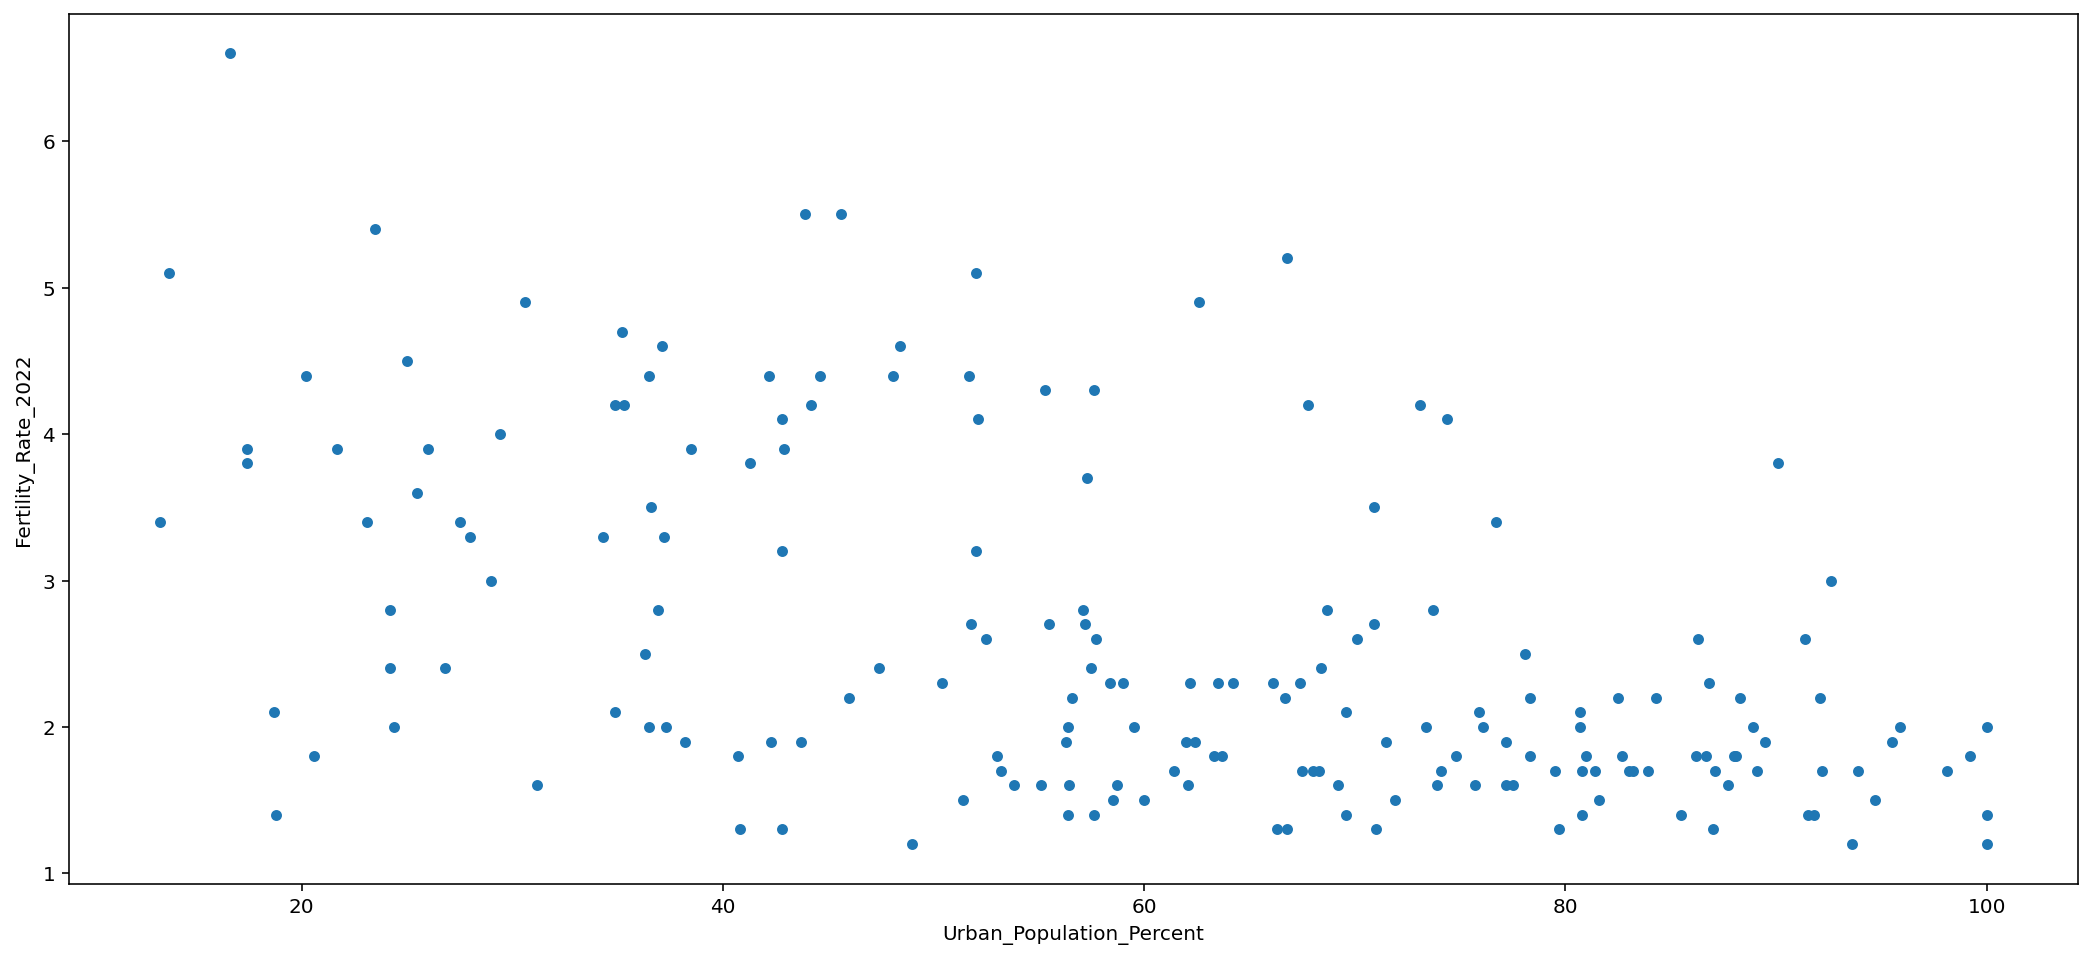

In [79]:

countries_set = set(urbanization_df.Country).intersection(set(fertility_df.Country))
rows_list = []
for country_name in countries_set:
    row_dict = {}
    row_dict['country_name'] = country_name
    mask_series = (urbanization_df.Country == country_name)
    Urban_Population_Percent = urbanization_df[mask_series].Urban_Population_Percent.squeeze()
    assert isinstance(Urban_Population_Percent, np.float64)
    row_dict['Urban_Population_Percent'] = Urban_Population_Percent
    mask_series = (fertility_df.Country == country_name)
    Fertility_Rate_2022 = fertility_df[mask_series].Fertility_Rate_2022.squeeze()
    row_dict['Fertility_Rate_2022'] = Fertility_Rate_2022
    rows_list.append(row_dict)
df = pd.DataFrame(rows_list).sort_values('Urban_Population_Percent')
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
Line2D_objs_list = df.plot.scatter('Urban_Population_Percent', 'Fertility_Rate_2022', ax=ax)

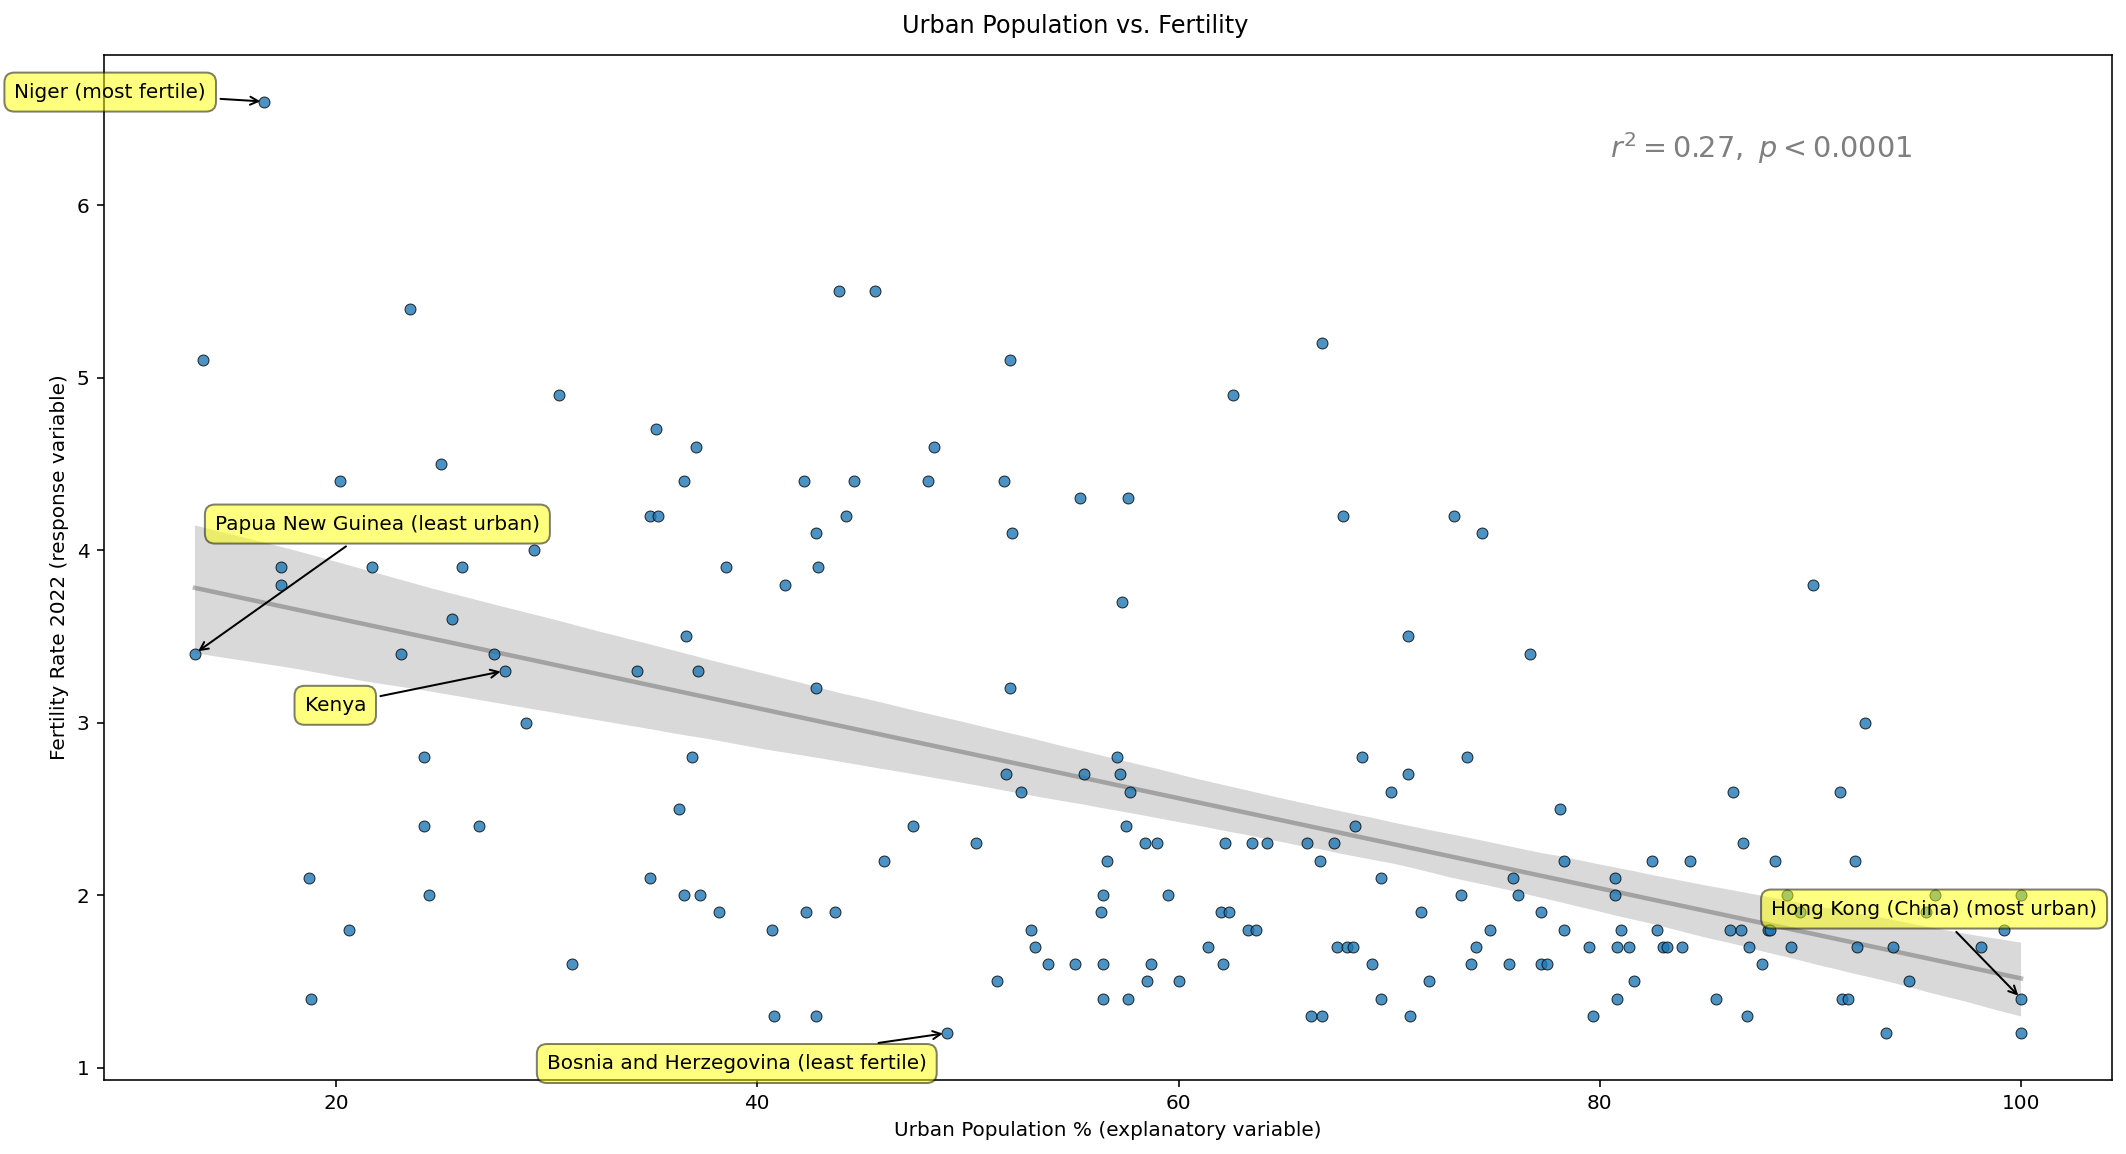

In [80]:

fig = first_order_linear_scatterplot(df.set_index('country_name'), 'Urban_Population_Percent', 'Fertility_Rate_2022',
                                     xlabel_str='Urban Population % (explanatory variable)',
                                     ylabel_str='Human Development Index 2022 (response variable)',
                                     x_adj='urban', y_adj='fertile',
                                     title='Urban Population vs. Fertility',
                                     idx_reference='Kenya', annot_reference='',
                                     least_x_xytext=(10, 60), most_x_xytext=(-125, 40),
                                     least_y_xytext=(-200, -20), most_y_xytext=(-125, 0),
                                     reference_xytext=(-100, -22), color_list=None, verbose=False)


# Female School Enrollment vs Human Development Index

The female school enrollment data is from [https://data.worldbank.org/indicator/SE.SEC.ENRR.FE](https://data.worldbank.org/indicator/SE.SEC.ENRR.FE) and the fertility data is from [https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependencies_by_total_fertility_rate](https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependencies_by_total_fertility_rate). The jupyter notebook can be seen at [https://github.com/dbabbitt/StatsByCountry/blob/master/ipynb/Weekly%20Worship%20vs%20Fertility%Rate.ipynb](https://github.com/dbabbitt/StatsByCountry/blob/master/ipynb/Weekly%20Worship%20vs%20Fertility%20Rate.ipynb).

A low $r^2$ of at least [0.1](https://www.researchgate.net/publication/361406942_The_Acceptable_R-Square_in_Empirical_Modelling_for_Social_Science_Research) (or 10 percent) is acceptable in the social sciences on the condition that some or most of the predictors or explanatory variables are statistically significant. So female school enrollment "explains" 67 percent of the variance in the Human Development Index.

And, yes, the data for Puerto Rico is separate from the US data in both datasets. Thank you for noticing.

In [116]:

# From https://data.worldbank.org/indicator/SE.SEC.ENRR.FE
file_path = '../data/html/female_school_enrollment.html'
enrollment_df = pd.read_html(file_path)[0].copy()
enrollment_df.columns = [str(cn).replace(' ', '_') for cn in enrollment_df.iloc[0]]
enrollment_df = enrollment_df.iloc[1:]
enrollment_df = clean_numerics(enrollment_df, columns_list=['Most_Recent_Year', 'Most_Recent_Value'])
enrollment_df

,Country,Most_Recent_Year,Most_Recent_Value
1,Afghanistan,2018.0,40.0
2,Albania,2020.0,95.0
3,Algeria,2011.0,102.0
4,American Samoa,1992.0,89.0
5,Andorra,1983.0,52.0
...,...,...,...
244,Low & middle income,2020.0,73.0
245,Low income,2020.0,36.0
246,Lower middle income,2020.0,70.0
247,Middle income,2020.0,78.0


In [117]:

mask_series = (enrollment_df.Country == 'St. Vincent and the Grenadines')
enrollment_df.loc[mask_series, 'Country'] = 'Saint Vincent and the Grenadines'
mask_series = (enrollment_df.Country == 'Sao Tome and Principe')
enrollment_df.loc[mask_series, 'Country'] = 'São Tomé and Príncipe'
mask_series = (enrollment_df.Country == 'Virgin Islands (U.S.)')
enrollment_df.loc[mask_series, 'Country'] = 'U.S. Virgin Islands (US)'
mask_series = (enrollment_df.Country == 'Venezuela, RB')
enrollment_df.loc[mask_series, 'Country'] = 'Venezuela'
mask_series = (enrollment_df.Country == 'Puerto Rico')
enrollment_df.loc[mask_series, 'Country'] = 'Puerto Rico (US)'
mask_series = (enrollment_df.Country == 'Hong Kong SAR, China')
enrollment_df.loc[mask_series, 'Country'] = 'Hong Kong (China)'
mask_series = (enrollment_df.Country == 'St. Lucia')
enrollment_df.loc[mask_series, 'Country'] = 'Saint Lucia'
mask_series = (enrollment_df.Country == 'Cabo Verde')
enrollment_df.loc[mask_series, 'Country'] = 'Cape Verde'
mask_series = (enrollment_df.Country == 'French Polynesia')
enrollment_df.loc[mask_series, 'Country'] = 'French Polynesia (France)'
mask_series = (enrollment_df.Country == 'Turkiye')
enrollment_df.loc[mask_series, 'Country'] = 'Turkey'
mask_series = (enrollment_df.Country == 'New Caledonia')
enrollment_df.loc[mask_series, 'Country'] = 'New Caledonia (France)'
mask_series = (enrollment_df.Country == 'Bahamas, The')
enrollment_df.loc[mask_series, 'Country'] = 'Bahamas'
mask_series = (enrollment_df.Country == 'Myanmar')
enrollment_df.loc[mask_series, 'Country'] = 'Myanmar (Burma)'
mask_series = (enrollment_df.Country == 'Yemen, Rep.')
enrollment_df.loc[mask_series, 'Country'] = 'Yemen'

In [118]:

left_list = list(set(fertility_df.Country) - set(enrollment_df.Country))
df = check_for_typos(left_list, set(enrollment_df.Country))
df.sort_values('max_similarity', ascending=False).head(20)

,left_item,right_item,max_similarity
6,Gambia,Zambia,0.833333
10,Brunei,Burundi,0.769231
12,French Guiana (France),French Polynesia (France),0.765957
4,Iran,Iraq,0.750000
1,Slovakia,Slovenia,0.750000
15,Aruba (Netherlands),Netherlands,0.733333
11,Syria,Serbia,0.727273
17,Czech Republic,Kyrgyz Republic,0.689655
7,Curaçao (Netherlands),Netherlands,0.687500
9,North Korea,North America,0.666667


In [119]:

mask_series = (enrollment_df.Country == 'Gambia, The')
enrollment_df.loc[mask_series, 'Country'] = 'Gambia'
mask_series = (enrollment_df.Country == 'xxxxxxx')
enrollment_df.loc[mask_series, 'Country'] = 'xxxxxxxx'

In [120]:

left_list = list(set(enrollment_df.Country) - set(fertility_df.Country))
df = check_for_typos(left_list, set(fertility_df.Country))
df.sort_values('max_similarity', ascending=False).head(20)

,left_item,right_item,max_similarity
19,South Asia,South Africa,0.818182
0,Greenland,Grenada,0.750000
16,North America,South Africa,0.720000
54,Kyrgyz Republic,Czech Republic,0.689655
66,Cayman Islands,Solomon Islands,0.689655
71,Czechia,China,0.666667
12,Dominica,Romania,0.666667
70,Aruba,Cuba,0.666667
25,Sub-Saharan Africa,South Africa,0.666667
32,Slovak Republic,Dominican Republic,0.666667


In [121]:

mask_series = enrollment_df.duplicated(subset=['Country'], keep='first')
enrollment_df = enrollment_df[~mask_series]

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\female_enrollment_vs_fertility_df.pkl


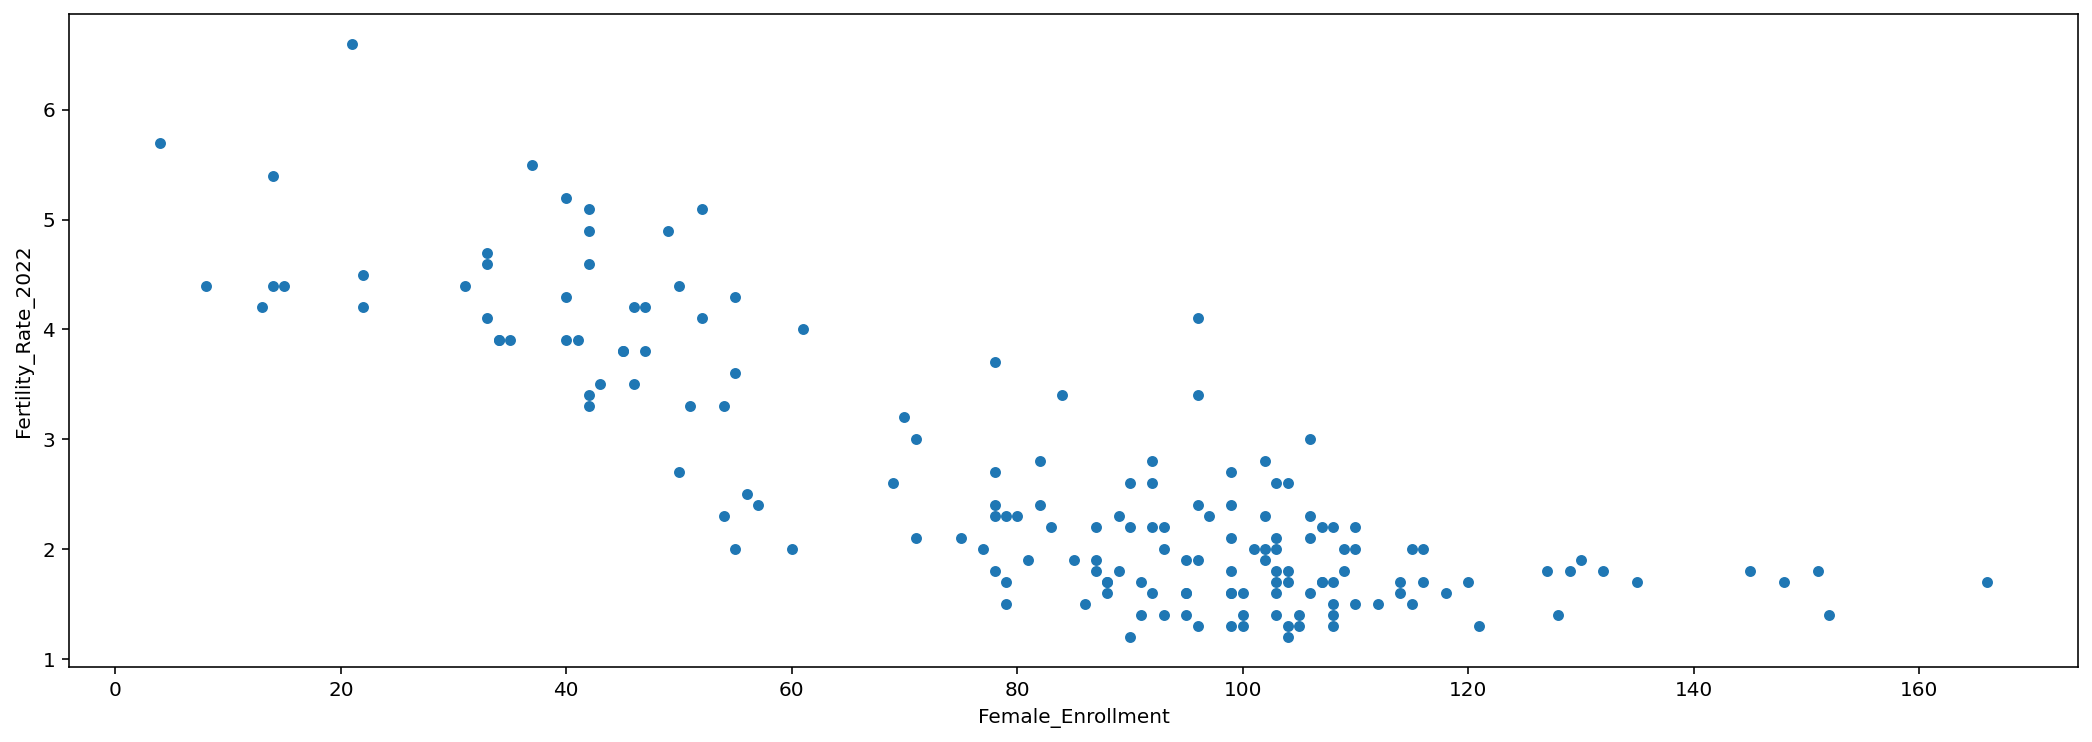

In [128]:

%run ../load_magic/storage.py

s = Storage()
countries_set = set(enrollment_df.Country).intersection(set(fertility_df.Country))
rows_list = []
for country_name in countries_set:
    row_dict = {}
    row_dict['country_name'] = country_name
    mask_series = (enrollment_df.Country == country_name)
    Female_Enrollment = enrollment_df[mask_series].Most_Recent_Value.squeeze()
    assert isinstance(Female_Enrollment, np.float64)
    row_dict['Female_Enrollment'] = Female_Enrollment
    mask_series = (fertility_df.Country == country_name)
    Fertility_Rate_2022 = fertility_df[mask_series].Fertility_Rate_2022.squeeze()
    row_dict['Fertility_Rate_2022'] = Fertility_Rate_2022
    rows_list.append(row_dict)
df = pd.DataFrame(rows_list).sort_values('Female_Enrollment')
s.store_objects(female_enrollment_vs_fertility_df=df)
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
Line2D_objs_list = df.plot.scatter('Female_Enrollment', 'Fertility_Rate_2022', ax=ax)

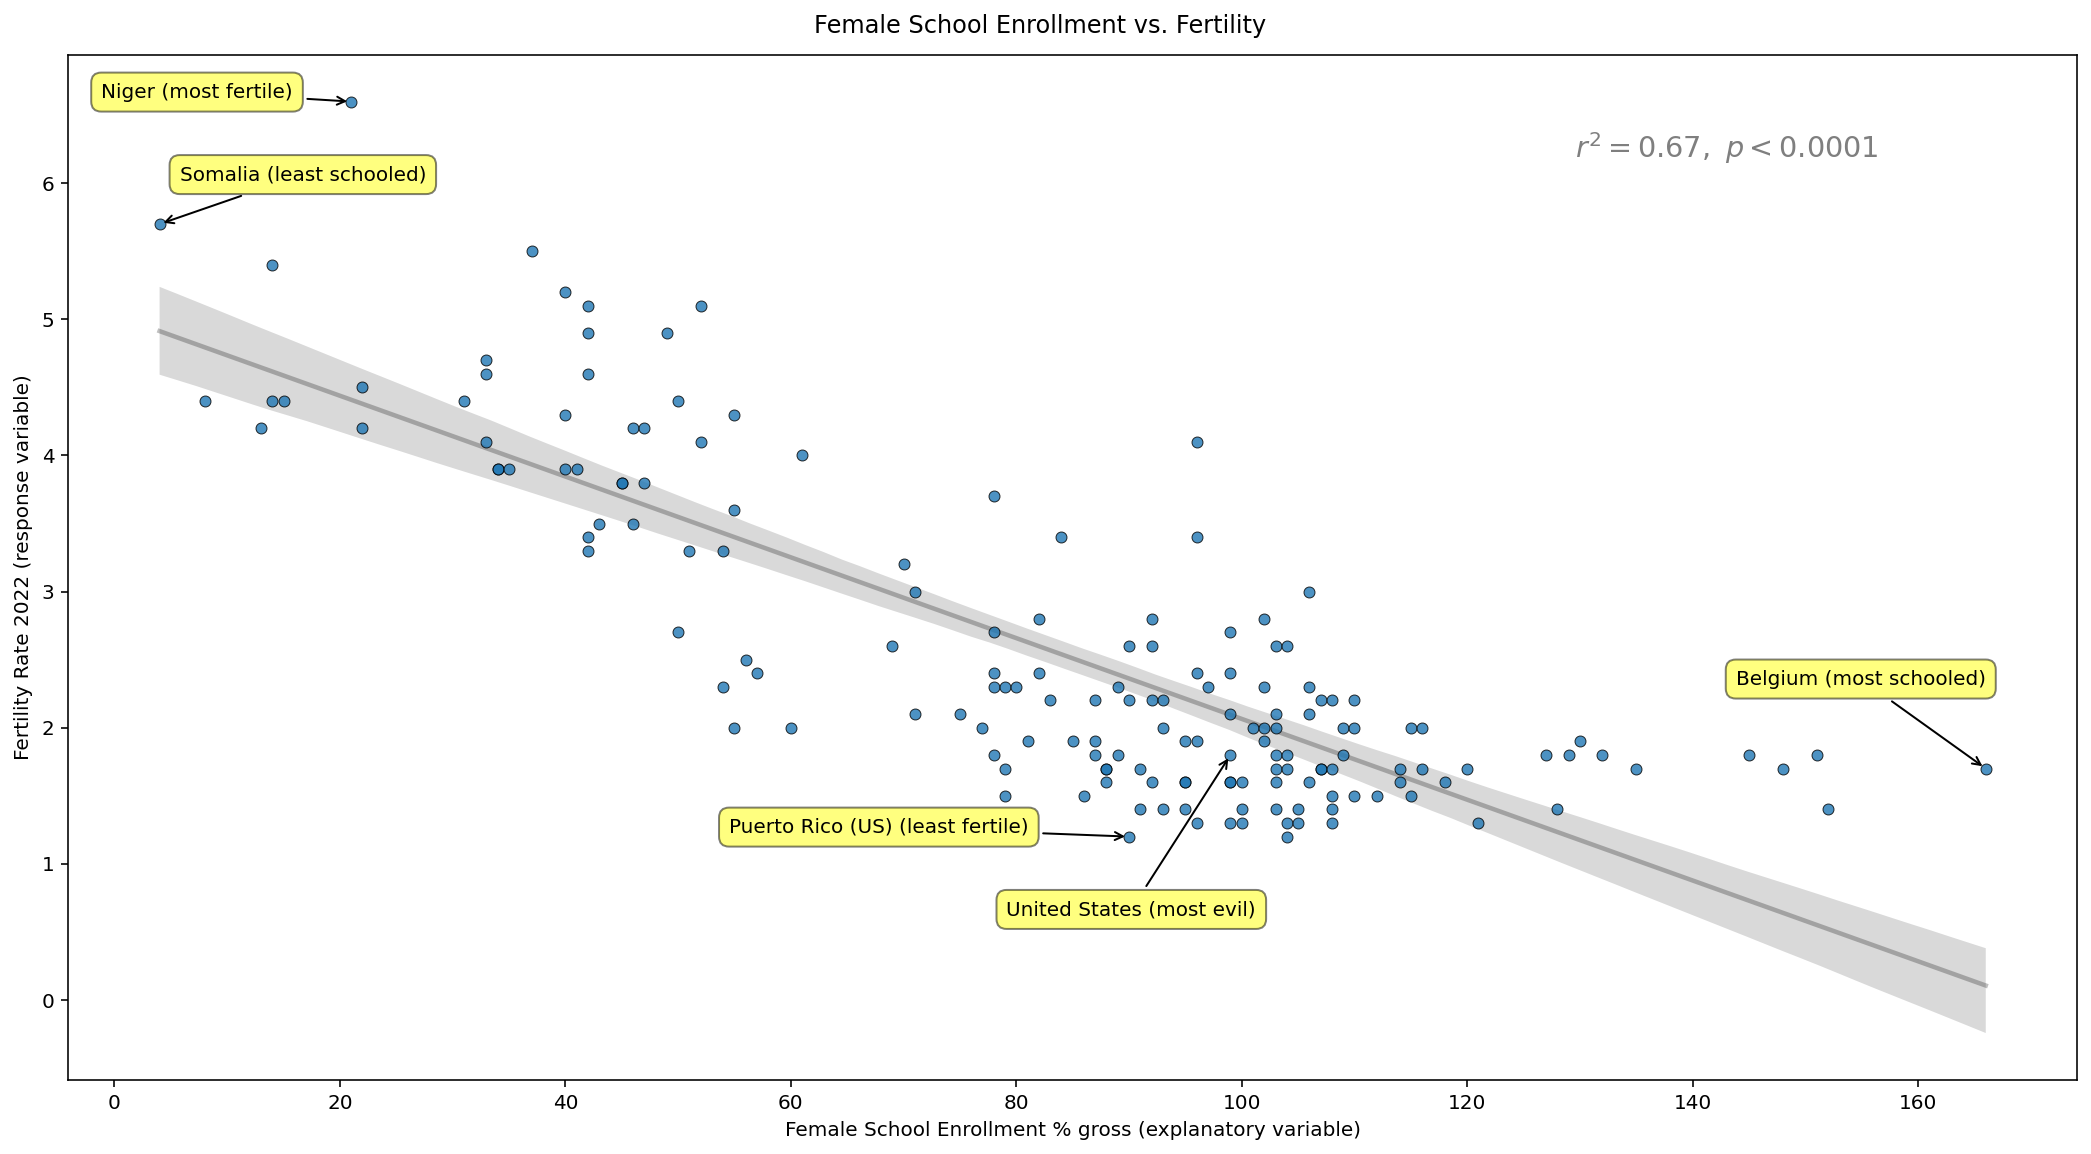

In [129]:

fig = first_order_linear_scatterplot(df.set_index('country_name'), 'Female_Enrollment', 'Fertility_Rate_2022',
                                     xlabel_str='Female School Enrollment % gross (explanatory variable)',
                                     ylabel_str='Human Development Index 2022 (response variable)',
                                     x_adj='schooled', y_adj='fertile',
                                     title='Female School Enrollment vs. Fertility',
                                     # idx_reference='Kenya', annot_reference='',
                                     least_x_xytext=(10, 20), most_x_xytext=(-125, 40),
                                     least_y_xytext=(-200, 0), most_y_xytext=(-125, 0),
                                     reference_xytext=(-112, -82), color_list=None, verbose=False)


The US label is a light-hearted parody of the morally conceited nature of Reddit social dynamics. Take it in the spirit it was given.

In [112]:

save_fig_as_various(fig, 'female_enrollment_vs_fertility', dir_names_list=['png'], verbose=True)

Saving plot to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\png\female_enrollment_vs_fertility.png
